<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Создание-новых-и-корректировка-существующих-признаков" data-toc-modified-id="Создание-новых-и-корректировка-существующих-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание новых и корректировка существующих признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-class" data-toc-modified-id="Признак-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Признак <code>class</code></a></span></li><li><span><a href="#Признак-world_region" data-toc-modified-id="Признак-world_region-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Признак <code>world_region</code></a></span></li><li><span><a href="#Признак-closed_at" data-toc-modified-id="Признак-closed_at-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Признак <code>closed_at</code></a></span></li><li><span><a href="#Признак-lifetime" data-toc-modified-id="Признак-lifetime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Признак <code>lifetime</code></a></span></li><li><span><a href="#Признаки-days_between_fundings,-first_funding_year,-first_funding_month,-last_funding_year,-last_funding_month" data-toc-modified-id="Признаки-days_between_fundings,-first_funding_year,-first_funding_month,-last_funding_year,-last_funding_month-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Признаки <code>days_between_fundings</code>, <code>first_funding_year</code>, <code>first_funding_month</code>, <code>last_funding_year</code>, <code>last_funding_month</code></a></span></li><li><span><a href="#Признак-status" data-toc-modified-id="Признак-status-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Признак <code>status</code></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ-признаков" data-toc-modified-id="Корреляционный-анализ-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ признаков</a></span></li><li><span><a href="#Использование-пайплайнов-и-поиск-лучшей-прогнозной-модели" data-toc-modified-id="Использование-пайплайнов-и-поиск-лучшей-прогнозной-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Использование пайплайнов и поиск лучшей прогнозной модели</a></span></li><li><span><a href="#Формирование-предсказаний-по-лучшей-модели" data-toc-modified-id="Формирование-предсказаний-по-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Формирование предсказаний по лучшей модели</a></span></li><li><span><a href="#Анализ-важности-признаков-лучшей-модели" data-toc-modified-id="Анализ-важности-признаков-лучшей-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Анализ важности признаков лучшей модели</a></span></li><li><span><a href="#Отчет-по-исследованию:" data-toc-modified-id="Отчет-по-исследованию:-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчет по исследованию:</a></span></li></ul></div>

# Проект: разработка модели для предсказания успешности стартапа

Описание проекта: на основе предоставленных псевдо-реальных (реальные данные, в которые добавлена синтетическая составляющая) данных о стартапах, функционировавших в период с 1970-й по 2018-й годы (с '1970-01-01' по '2018-01-01', дата формирования выгрузки - '2018-01-01'), предсказать, какие из них закроются

## Загрузка данных

Загрузим необходимые библиотеки:

In [1]:
pip install catboost

In [2]:
pip install phik

In [3]:
pip install shap

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import shap
import warnings
warnings.filterwarnings("ignore")

import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from itertools import combinations
from catboost import CatBoostClassifier

import math
from math import factorial

from scipy import stats as st
from scipy.stats import binom

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import(
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    RobustScaler
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    LabelEncoder
)
from sklearn.tree import DecisionTreeClassifier, plot_tree, \
  DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (
    f1_score,
    make_scorer
)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, \
  mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification

In [5]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [6]:
# загрузка файлов данных из GD:
! gdown --id 1Z9FLr7CVvbdgwGUm6P3SXWfi_Zgm6-I6 -q
! gdown --id 1O8hCjTPlfzRcNWD9hwMFcLgGue10vFUU -q

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


In [7]:
df_train = pd.read_csv('/content/startups_train.csv')
df_test = pd.read_csv('/content/startups_test.csv')

Здесь df_train - информация (53 000) о стартапах, которые будут использоваться в качестве обучающих данных, df_test - информация (13 000) о стартапах, которые будут использоваться в качестве тестовых данных.

Проверим, что данные загрузились корректно:

In [8]:
# настройка для вывода всех столбцов в датасетах
pd.set_option('display.max_columns', None)

In [9]:
# функция для получения информации о датасете
def get_info(dataset):
    print('Первые пять строк датасета:')
    display(dataset.head())
    print('Общая информация:')
    dataset.info()

In [10]:
get_info(df_train)

Первые пять строк датасета:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


Столбцы, содержащие даты, нуждаются в корректировке типов данных:

In [11]:
df_train['founded_at'] = \
                      pd.to_datetime(df_train['founded_at'])
df_train['first_funding_at'] = \
                      pd.to_datetime(df_train['first_funding_at'])
df_train['last_funding_at'] = \
                      pd.to_datetime(df_train['last_funding_at'])
df_train['closed_at'] = \
                      pd.to_datetime(df_train['closed_at'])

In [12]:
get_info(df_test)

Первые пять строк датасета:


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


Столбцы, содержащие даты, нуждаются в корректировке типов данных:

In [13]:
df_test['first_funding_at'] = \
                      pd.to_datetime(df_test['first_funding_at'])
df_test['last_funding_at'] = \
                      pd.to_datetime(df_test['last_funding_at'])

Названия всех столбцов уже приведены к единому виду (snake_case, латиница, строчные буквы).

Описание полей данных:

- `name` - Идентификатор (название стартапа)
- `category_list` - Список категорий, к которым относится стартап
- `funding_total_usd` - Общая сумма финансирования в USD
- `status` - Статус стартапа (закрыт или действующий). Целевой признак, для каждого стартапа нужно предсказать категориальное значение, соответствующее прогнозу: 'operating' или 'closed'
- `country_code` - Код страны
- `state_code` - Код штата
- `region` - Регион
- `city` - Город
- `funding_rounds` - Количество раундов финансирования
- `founded_at` - Дата основания
- `first_funding_at` - Дата первого раунда финансирования
- `last_funding_at` - Дата последнего раунда финансирования
- `closed_at` - Дата закрытия стартапа (если применимо)
- `lifetime` - Время существования стартапа в днях

Вывод по разделу:

- считаны данные из предоставленных датасетов, названия столбцов не требуют корректировки, у некоторых столбцов поменяли тип данных (на `datetime`, соответственно их значениям). Переходим к этапу предобработки данных.

## Предобработка данных

Проверим тренировочный датасет `df_train` на наличие пропусков и явных дубликатов, для этого создадим функцию:

In [14]:
def data_check(dataset):
    print("\nПроверка на наличие пропусков в датасете\n")
    null = dataset.isnull().sum()
    if null.sum() > 0:
            print("Пропущенные значения в датасете:\n")
            print(null)
    else:
        print("Отсутствуют пропущенные значения в датасете\n")

    print("\nПроверка на наличие явных дубликатов в датасете\n")
    duplicates = dataset.duplicated().sum()
    if duplicates > 0:
        print(f"В датасете {duplicates} явных дубликатов")
    else:
        print("Отсутствуют явные дубликаты в датасете")

In [15]:
data_check(df_train)


Проверка на наличие пропусков в датасете

Пропущенные значения в датасете:

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

Проверка на наличие явных дубликатов в датасете

Отсутствуют явные дубликаты в датасете


Заполним пропуски в категориальных признаках `name`, `category_list`, `country_code`, `state_code`, `region`, `city` значениями-заглушками:

In [16]:
df_train['name'] = df_train['name'].fillna('unknown_name')
df_train['category_list'] = df_train['category_list'].fillna('unknown_category')
df_train['country_code'] = df_train['country_code']. \
                                            fillna('unknown_country_code')
df_train['state_code'] = df_train['state_code'].fillna('unknown_state_code')
df_train['region'] = df_train['region'].fillna('unknown_region')
df_train['city'] = df_train['city'].fillna('unknown_city')

Пропуски в признаке `funding_total_usd` заполним медианными значениями по этому столбцу:

In [17]:
med_value_train = df_train['funding_total_usd'].median()
df_train['funding_total_usd'].fillna(med_value_train, inplace=True)

Пропуски в столбце `closed_at` пока заполнять не будем, примем решение позже

In [18]:
# Проверка на пропущенные значения
data_check(df_train)


Проверка на наличие пропусков в датасете

Пропущенные значения в датасете:

name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

Проверка на наличие явных дубликатов в датасете

Отсутствуют явные дубликаты в датасете


То же самое проделаем с тестовым датасетом `df_test`:

In [19]:
data_check(df_test)


Проверка на наличие пропусков в датасете

Пропущенные значения в датасете:

name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

Проверка на наличие явных дубликатов в датасете

Отсутствуют явные дубликаты в датасете


In [20]:
df_test['category_list'] = df_test['category_list'].fillna('unknown_category')
df_test['country_code'] = df_test['country_code']. \
                                            fillna('unknown_country_code')
df_test['state_code'] = df_test['state_code'].fillna('unknown_state_code')
df_test['region'] = df_test['region'].fillna('unknown_region')
df_test['city'] = df_test['city'].fillna('unknown_city')

In [21]:
med_value_test = df_test['funding_total_usd'].median()
df_test['funding_total_usd'].fillna(med_value_test, inplace=True)

In [22]:
data_check(df_test)


Проверка на наличие пропусков в датасете

Отсутствуют пропущенные значения в датасете


Проверка на наличие явных дубликатов в датасете

Отсутствуют явные дубликаты в датасете


Вывод по разделу:
- проверили тренировочный и тестовый датасеты на наличие пропусков и явных дубликатов: пропуски в категориальных признаках `name`, `category_list`, `country_code`, `state_code`, `region`, `city` заполнили значениями-заглушками, в признаке `funding_total_usd` - медианными значениями. Явные дубликаты отсутствуют.

## Создание новых и корректировка существующих признаков

### Признак `class`

In [23]:
# Выгрузим названия всех категорий, выделив их из строк:
df_train['category_list'].str.split('|').explode().unique()

array(['Online Reservations', 'Restaurants', 'Manufacturing', 'Medical',
       'Medical Devices', 'Biotechnology', 'Health Care', 'Mobile',
       'Analytics', 'Business Analytics', 'Social CRM',
       'Social Media Monitoring', 'Software', 'Semiconductors',
       'Clean Technology', 'unknown_category', 'Nanotechnology',
       'Technology', 'Wine And Spirits', 'Customer Service', 'Delivery',
       'Retail', 'Cloud Data Services', 'Computers', 'Networking',
       'Banking', 'Finance', 'Loyalty Programs', 'Messaging', 'Consumers',
       'Generation Y-Z', 'Photo Sharing', 'Social Media',
       'College Recruiting', 'Enterprise Software', 'Recruiting', 'SaaS',
       'Social Recruiting', 'Financial Services', 'Payments',
       'Cloud Computing', 'Enterprise Resource Planning', 'DIY',
       'Environmental Innovation', 'Entertainment', 'Games', 'Internet',
       'Pets', 'Services', 'Advertising', 'Sales and Marketing',
       'Fitness', 'Sports', 'Consumer Goods', 'Food Processing

In [24]:
# Посчитаем количество уникальных значений категорий
cat_num = df_train['category_list'].str.split('|').explode().value_counts()
cat_num

,count
category_list,
Software,7017
Mobile,4399
Biotechnology,3668
E-Commerce,3308
unknown_category,2465
...,...
First Aid,1
Quantitative Marketing,1
Startup Histrionics,1


Получили 855 уникальных значений категорий. Классифицируем их, воспользовавшись ChatGPT (прогоним весь список категорий с задачей присвоить им классы):

In [25]:
# Список классов, сгенерированный ChatGPT:
gpt_class = [
    "Advertising", "Accounting", "Agriculture", "Analytics", "Apparel", \
    "Apps", "Asset Management", "Augmented Reality", "Automotive", \
    "Aviation", "Banking and Exchange", "Beverage", "Biotechnology", \
    "Career", "Climate", "Construction", "Consumer Electronics", \
    "Consumer Finance", "Consumer Health", "Consumer", "Content", "Cosmetics", \
    "Credit and Lending", "Delivery", "Design", "Diagnostics", "Drones", \
    "Drug Discovery", "E-Commerce", "Education", "Energy", "Engineering", \
    "Finance", "Fintech", "Food", "Games", "Government", "Health Care",
    "Home", "Housing", "Human Resources", "Industrial Bio", "Industrials", \
    "Infrastructure", "Insurance", "Internet", "Job", "Legal", "Leisure", \
    "Logistics", "Manufacturing", "Marketing", "Medical", "Mobile",
    "Office Management", "Operations", "Other", "Payments", "Personal", \
    "Product", "Productivity", "Real Estate", "Recruiting", "Retail", \
    "Robotics", "SaaS", "Sales", "Security", "Services", "Social Media", \
    "Software", "Supply Chain", "Talent", "Technology", "Therapeutics",
    "Tourism", "Transportation", "Travel", "Virtual Reality", "Wellness"
]
# Создадим функцию для классификации категорий
def class_gen(category_list, gpt_class):
    categories = category_list.split('|')
    for i in gpt_class:
        if any(i in category for category in categories):
            return i
    return 'Other'

# Применим функцию к столбцу
df_train['class'] = df_train['category_list']. \
                                apply(lambda x: class_gen(x, gpt_class))

In [26]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,Other
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,Manufacturing
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,Biotechnology
3,Sancilio and Company,Health Care,22250000.0,operating,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,NaT,Health Care
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,Manufacturing


In [27]:
# Проверим, как прошло разделение по классам
df_train.pivot_table(index='class', values='name', aggfunc='count')

,name
class,
Accounting,103
Advertising,2213
Agriculture,112
Analytics,1742
Apps,1373
...,...
Therapeutics,16
Tourism,88
Transportation,247


Такую же классификацию сделаем для тестового датасета

In [28]:
df_test['class'] = df_test['category_list']. \
                                apply(lambda x: class_gen(x, gpt_class))

In [29]:
df_test.pivot_table(index='class', values='name', aggfunc='count')

,name
class,
Accounting,24
Advertising,528
Agriculture,30
Analytics,434
Apps,346
...,...
Therapeutics,3
Tourism,27
Transportation,72


In [30]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,Other
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,Manufacturing
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,Biotechnology
3,Sancilio and Company,Health Care,22250000.0,operating,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,NaT,Health Care
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,Manufacturing


### Признак `world_region`

Судя по данным в столбце `country_code`, в выборке присутствуют стартапы со всего Мира. Их можно разбить на группы, взяв информацию о принадлежности ISO-3 к региону, например, отсюда: https://cloford.com/resources/codes/index.htm

In [31]:
# Создадим функцию, которая получает ISO-3 код и возвращает
# привязанное к нему значение региональной принадлежности
def get_world_region(iso_code):
  # Создадим словарь с привязкой кодов стран к регионам:
  region_country = {
      'Antarctica': ['ATA'],
      'Central Africa': ['BDI', 'CAF', 'TCD', 'COG', 'RWA', 'ZAR'],
      'Central America': ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'MEX', 'NIC', \
        'PAN'],
      'Central Asia': ['KAZ', 'KGZ', 'TJK', 'TKM', 'UZB'],
      'Central Europe': ['AUT', 'CZE', 'HUN', 'LIE', 'SVK', 'CHE'],
      'East Asia': ['CHN', 'JPN', 'PRK', 'KOR', 'TWN', 'HKG', 'MAC'],
      'Eastern Africa': ['DJI', 'ERI', 'ETH', 'KEN', 'SOM', 'TZA', 'UGA'],
      'Eastern Europe': ['BLR', 'EST', 'LVA', 'LTU', 'MDA', 'POL', 'UKR'],
      'Indian Ocean': ['COM', 'MDG', 'MUS', 'MYT', 'REU', 'SYC'],
      'North America': ['CAN', 'GRL', 'SPM', 'USA'],
      'North Pacific Ocean': ['UMI'],
      'Northern Africa': ['DZA', 'EGY', 'LBY', 'MAR', 'SDN', 'TUN', 'ESH'],
      'Northern Asia': ['MNG', 'RUS'],
      'Northern Europe': ['DNK', 'FRO', 'FIN', 'ISL', 'NOR', 'SJM', 'SWE'],
      'Pacific': ['ASM', 'AUS', 'COK', 'FJI', 'PYF', 'GUM', 'KIR', 'MHL', \
        'FSM', 'NCL', 'NRU', 'NCL', 'NZL', 'NIU', 'NFK', 'MNP', 'PLW', 'PNG', \
        'PCN', 'SLB', 'TKL', 'TON', 'TUV', 'VUT', 'WLF', 'WSM'],
      'South America': ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'FLK', \
        'GUF', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN'],
      'South Asia': ['AFG', 'BGD', 'BTN', 'IND', 'MDV', 'NPL', 'PAK', 'LKA', \
        'IOT'],
      'South Atlantic Ocean': ['BVT', 'SHN', 'SGS'],
      'South East Asia': ['BRN', 'KHM', 'CXR', 'CCK', 'IDN', 'LAO', 'MYS', \
        'MMR', 'PHL', 'SGP', 'THA', 'VNM', 'TMP'],
      'South East Europe': ['ALB', 'BIH', 'BGR', 'HRV', 'GRC', 'MKD', 'ROM',
        'SVN', 'YUG'],
      'South West Asia': ['ARM', 'AZE', 'BHR', 'CYP', 'GEO', 'IRN', 'IRQ', \
        'ISR', 'JOR', 'KWT', 'LBN', 'OMN', 'QAT', 'SAU', 'SYR', 'TUR', 'ARE', \
        'YEM'],
      'South West Europe': ['AND', 'GIB', 'PRT', 'ESP'],
      'Southern Africa': ['AGO', 'BWA', 'LSO', 'MWI', 'MOZ', 'NAM', 'ZAF', \
        'SWZ', 'ZWB', 'ZWE'],
      'Southern Europe': ['VAT', 'ITA', 'MLT', 'SMR'],
      'Southern Indian Ocean': ['ATF', 'HMD'],
      'West Indies': ['AIA', 'ATG', 'ABW', 'BHS', 'BRB', 'BMU', 'VGB', 'CYM', \
        'CUB', 'DMA', 'DOM', 'GRD', 'GLP', 'HTI', 'JAM', 'MTQ', 'MSR', 'ANT', \
        'PRI', 'KNA', 'LCA', 'VCT', 'TTO', 'TCA', 'VIR'],
      'Western Africa': ['BEN', 'BFA', 'CMR', 'CPV', 'CIV', 'GNQ', 'GAB', \
        'GMB', 'GHA', 'GIN', 'GNB', 'LBR', 'MLI', 'MRT', 'NER', 'NGA', 'STP', \
        'SEN', 'SLE', 'TGO'],
      'Western Europe': ['BEL', 'FRA', 'DEU', 'IRL', 'LUX', 'MCO', 'NLD', \
        'GBR', 'FXX']
      }
  # Цикл для привязки пары "ключ-значение" из словаря
  for i in region_country.keys():
    if iso_code in region_country[i]:
      return i
  return 'unknown_region'

# Создаём новый признак в датасете:
df_train.loc[:, 'world_region'] = \
        df_train.loc[:, 'country_code'].apply(get_world_region)

In [32]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class,world_region
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,Other,Central Europe
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,Manufacturing,North America
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,Biotechnology,North America
3,Sancilio and Company,Health Care,22250000.0,operating,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,NaT,Health Care,unknown_region
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,Manufacturing,North America


То же самое для тестовой выборки:

In [33]:
# Создаём новый признак в датасете:
df_test.loc[:, 'world_region'] = \
        df_test.loc[:, 'country_code'].apply(get_world_region)
df_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,class,world_region
0,Crystalsol,Clean Technology,2819200.0,NIC,17,unknown_region,unknown_city,1,2009-07-01,2009-07-01,3501,Technology,Central America
1,JBI Fish & Wings,Hospitality,2000000.0,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,Other,North America
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,Finance,Western Europe
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,Software,North America
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209,Software,North America


### Признак `closed_at`

Пришло время заполнить пропуски в этом столбце для последующего создания признака `lifetime` в тестовой выборке (сейчас он там отсутствует):

In [34]:
# Заполнять пропуски в столбце будем датой выгрузки датасета (2018-01-01)
def fill_nan(row):
    try:
        i = row['closed_at']
        query_date = '2018-01-01'
        if pd.isna(i):
            return query_date
        else:
            return i
    except:
        pass

# Применим функцию
df_train['closed_at'] = df_train.apply(fill_nan, axis=1)
df_train['closed_at'] = pd.to_datetime(df_train['closed_at'])

### Признак `lifetime`

Создадим столбец `lifetime` (в днях) в датасете `df_train`, аналогичный одноимённому в `df_test`, на основании разницы между признаками `closed_at` и `founded_at`:

In [35]:
df_train['lifetime'] = (df_train['closed_at'] - df_train['founded_at']).dt.days

In [36]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class,world_region,lifetime
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,Other,Central Europe,2998
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,Manufacturing,North America,4748
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,Biotechnology,North America,4383
3,Sancilio and Company,Health Care,22250000.0,operating,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,Health Care,unknown_region,5114
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,Manufacturing,North America,2791


### Признаки `days_between_fundings`, `first_funding_year`, `first_funding_month`, `last_funding_year`, `last_funding_month`

In [37]:
# Создадим дополнительные признаки с информацией о раундах финансирования
df_train['days_between_fundings'] = (df_train['last_funding_at'] - \
                              df_train['first_funding_at']).dt.days
df_train['first_funding_year'] = df_train['first_funding_at'].dt.year
df_train['first_funding_month'] = df_train['first_funding_at'].dt.month
df_train['last_funding_year'] = df_train['last_funding_at'].dt.year
df_train['last_funding_month'] = df_train['last_funding_at'].dt.month


df_test['days_between_fundings'] = (df_test['last_funding_at'] - \
                              df_test['first_funding_at']).dt.days
df_test['first_funding_year'] = df_test['first_funding_at'].dt.year
df_test['first_funding_month'] = df_test['first_funding_at'].dt.month
df_test['last_funding_year'] = df_test['last_funding_at'].dt.year
df_test['last_funding_month'] = df_test['last_funding_at'].dt.month

In [38]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class,world_region,lifetime,days_between_fundings,first_funding_year,first_funding_month,last_funding_year,last_funding_month
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,Other,Central Europe,2998,1310,2011,5,2014,12
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,Manufacturing,North America,4748,1393,2010,5,2014,2
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,Biotechnology,North America,4383,681,2012,8,2014,7
3,Sancilio and Company,Health Care,22250000.0,operating,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,Health Care,unknown_region,5114,1051,2011,9,2014,7
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,Manufacturing,North America,2791,0,2012,2,2012,2


In [39]:
df_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,class,world_region,days_between_fundings,first_funding_year,first_funding_month,last_funding_year,last_funding_month
0,Crystalsol,Clean Technology,2819200.0,NIC,17,unknown_region,unknown_city,1,2009-07-01,2009-07-01,3501,Technology,Central America,0,2009,7,2009,7
1,JBI Fish & Wings,Hospitality,2000000.0,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,Other,North America,0,2010,7,2010,7
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,Finance,Western Europe,126,2014,5,2014,9
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,Software,North America,1935,2005,1,2010,4
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209,Software,North America,0,2007,5,2007,5


### Признак `status`

Оценим статус стартапов на момент выгрузки:

In [40]:
df_train.pivot_table(index='status', values='name', aggfunc='count')

,name
status,
closed,4917
operating,47599


Количество действующих стартапов сильно преобладает над закрывшимися (дисбаланс классов)

Нас интересуют значения статуса: `closed` или `operating`. Создадим отдельные датасеты для дальнейшего исследовательского анализа данных: `df_train_closed` и `df_train_operating`

In [41]:
df_train_closed = df_train.query('status == "closed"')
df_train_operating = df_train.query('status == "operating"')

Выводы по разделу:

- создали новый признак `class` для разбивки существующих 855 уникальных категорий по основным классам, воспользовавшись ChatGPT;
- создали новый признак `world_region`, привязав все ISO-3 коды стран к географическим регионам;
- заполнили пустые значения в признаке `closed_at` датой выгрузки тренировочного датасета;
- создали новый признак `lifetime` в тренировочной выборке, аналогичный одноимённому в тестовой;
- создали новые признаки `days_between_fundings`, `first_funding_year`, `first_funding_month`, `last_funding_year`, `last_funding_month`, чтобы использовать их в дальнейшем корреляционном анализе (привели к числовым значениям вместо дат);
- в признаке `status` обнаружен дисбаланс классов, создали отдельные датасеты для действующих и закрытых стартапов, которые и изучим в следующем пункте проекта.

## Исследовательский анализ данных

Посмотрим на статистические данные количественных признаков тренировочного датасета:

In [42]:
df_train.describe().round(2)

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,days_between_fundings,first_funding_year,first_funding_month,last_funding_year,last_funding_month
count,5.251600e+04,52516.00,52516,52516,52516,52516,52516.00,52516.00,52516.00,52516.00,52516.00,52516.00
mean,1.513232e+07,1.74,2008-11-04 09:44:16.196206848,2011-07-17 04:45:33.247010304,2012-06-27 16:29:42.313961472,2017-06-11 05:36:46.504684032,3140.83,346.49,2011.08,6.23,2012.01,6.35
min,1.000000e+00,1.00,1970-02-05 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,1983-10-06 00:00:00,19.00,0.00,1977.00,1.00,1977.00,1.00
25%,5.297212e+05,1.00,2006-10-01 00:00:00,2009-10-12 00:00:00,2011-02-01 00:00:00,2018-01-01 00:00:00,1739.00,0.00,2009.00,3.00,2011.00,3.00
50%,2.000000e+06,1.00,2010-10-01 00:00:00,2012-07-23 00:00:00,2013-08-30 00:00:00,2018-01-01 00:00:00,2557.00,0.00,2012.00,6.00,2013.00,6.00
75%,6.788929e+06,2.00,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,2018-01-01 00:00:00,4018.00,427.00,2014.00,9.00,2014.00,9.00
max,3.007950e+10,19.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2018-01-01 00:00:00,17378.00,10807.00,2015.00,12.00,2015.00,12.00
std,1.683466e+08,1.37,NaN,NaN,NaN,NaN,2147.82,688.60,3.61,3.53,3.34,3.46


Пока ничего подозрительного не наблюдается. Посмотрим на доли выбросов в интересующих нас количественных столбцах:

In [43]:
def outliers(dataset, column):
    q1 = dataset[column].quantile(0.25) # первый квартиль
    q3 = dataset[column].quantile(0.75)  # третий квартиль
    iqr = q3 - q1  # межквартильный размах
    quant1 = q1 - 1.5*iqr  # нижняя граница выбросов
    quant3 = q3 + 1.5*iqr  # верхняя граница выбросов
    total = dataset.shape[0]  # общее количество строк в датафрейме
    emission = dataset[(dataset[column] < quant1) | \
     (dataset[column] > quant3)].shape[0]
    # количество выбросов
    emission_quant = (emission / total) * 100  # доля выбросов в столбце
    return np.round((emission_quant), decimals=2)
    # возвращаем долю выбросов в столбце

In [44]:
dataset = df_train
column_list = ['funding_total_usd', 'funding_rounds', 'lifetime', \
        'days_between_fundings', 'first_funding_year', 'first_funding_month', \
        'last_funding_year', 'last_funding_month']
for value in column_list:
    print(f'Доля выбросов в {value}, в процентах: {outliers(dataset, value)}')

Доля выбросов в funding_total_usd, в процентах: 14.88
Доля выбросов в funding_rounds, в процентах: 9.07
Доля выбросов в lifetime, в процентах: 4.22
Доля выбросов в days_between_fundings, в процентах: 11.91
Доля выбросов в first_funding_year, в процентах: 2.46
Доля выбросов в first_funding_month, в процентах: 0.0
Доля выбросов в last_funding_year, в процентах: 7.05
Доля выбросов в last_funding_month, в процентах: 0.0


Наблюдаем большое количество выбросов в `funding_total_usd` и `days_between_fundings`. Создадим функции для построения гистограмм и диаграмм размаха:

In [45]:
# Гистограмма распределения количественных признаков
def histogram(dataset, column):
    dataset[column].plot(kind='hist', bins=20, grid=True, \
                figsize=(5, 5), title=(f'Распределение признака "{column}"'))
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()
    return None

# Диаграмма размаха
def whiskers(dataset, column):
    dataset.boxplot(column, figsize=(5, 5))
    plt.title(f'Диаграмма размаха признака "{column}"')
    plt.ylabel('Количество')
    plt.show()
    print(dataset[column].describe().round(2))
    return None

Категориальные признаки датасета анализировать не будем, ввиду большого количества их уникальных значений, а в случае с `class` - не слишком "честной" классификации (классифицировали не вручную)

Построим гистограммы размаха для действующих (`df_train_operating`) и закрытых (`df_train_closed`) стартапов, которые мы создали в предыдущем пункте:

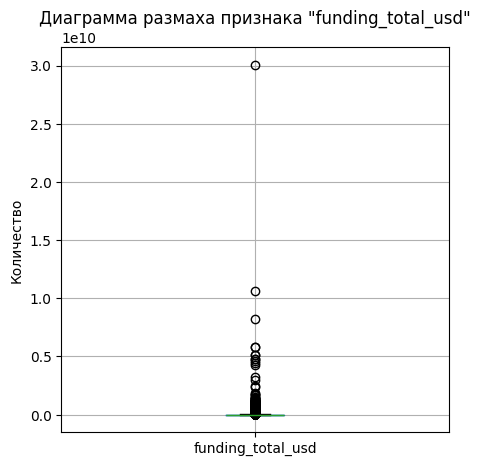

count    4.759900e+04
mean     1.573001e+07
std      1.763061e+08
min      1.000000e+00
25%      5.600000e+05
50%      2.000000e+06
75%      7.000000e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64


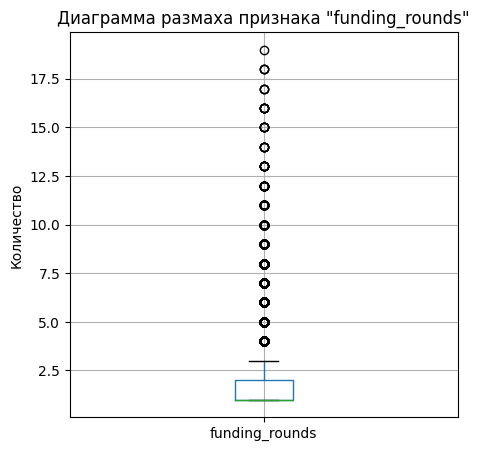

count    47599.00
mean         1.78
std          1.41
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         19.00
Name: funding_rounds, dtype: float64


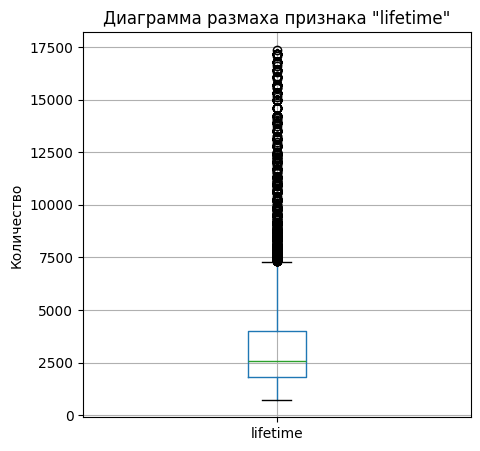

count    47599.00
mean      3320.73
std       2132.55
min        731.00
25%       1826.00
50%       2579.00
75%       4018.00
max      17378.00
Name: lifetime, dtype: float64


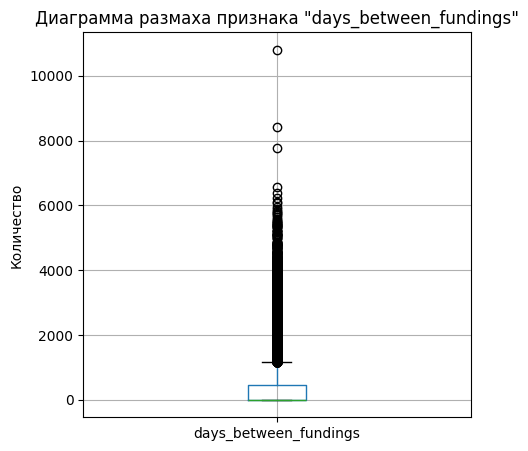

count    47599.00
mean       363.52
std        705.07
min          0.00
25%          0.00
50%          0.00
75%        465.00
max      10807.00
Name: days_between_fundings, dtype: float64


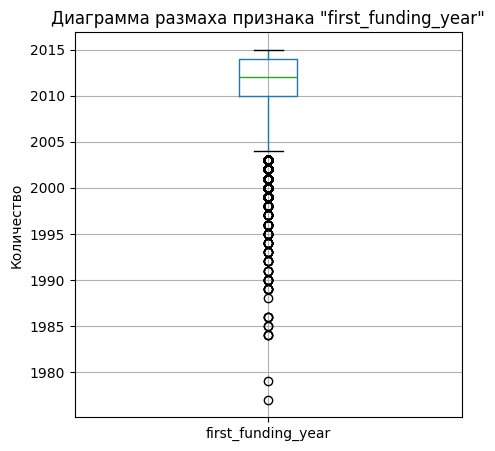

count    47599.00
mean      2011.23
std          3.50
min       1977.00
25%       2010.00
50%       2012.00
75%       2014.00
max       2015.00
Name: first_funding_year, dtype: float64


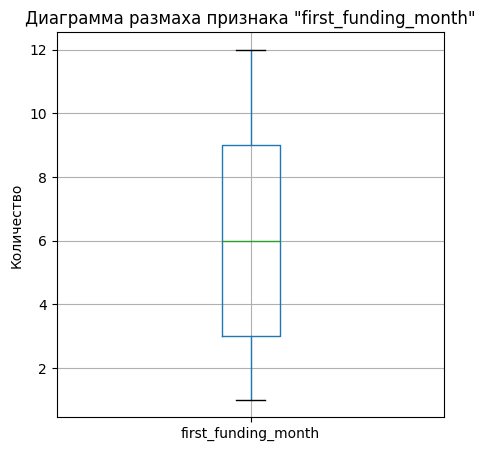

count    47599.00
mean         6.25
std          3.53
min          1.00
25%          3.00
50%          6.00
75%          9.00
max         12.00
Name: first_funding_month, dtype: float64


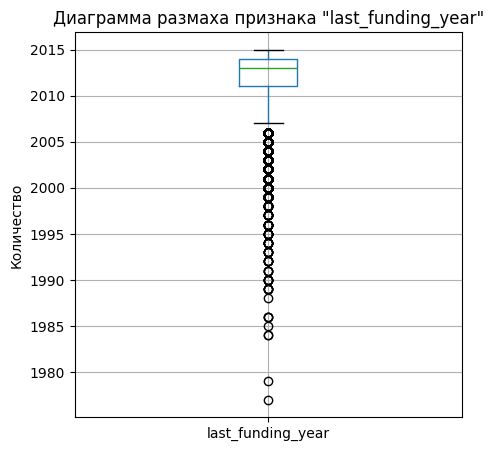

count    47599.00
mean      2012.21
std          3.17
min       1977.00
25%       2011.00
50%       2013.00
75%       2014.00
max       2015.00
Name: last_funding_year, dtype: float64


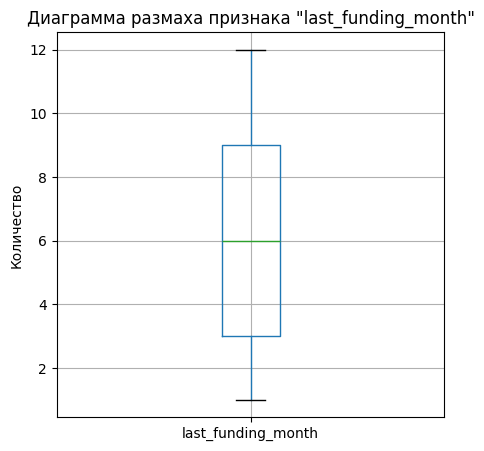

count    47599.00
mean         6.38
std          3.45
min          1.00
25%          3.00
50%          6.00
75%          9.00
max         12.00
Name: last_funding_month, dtype: float64


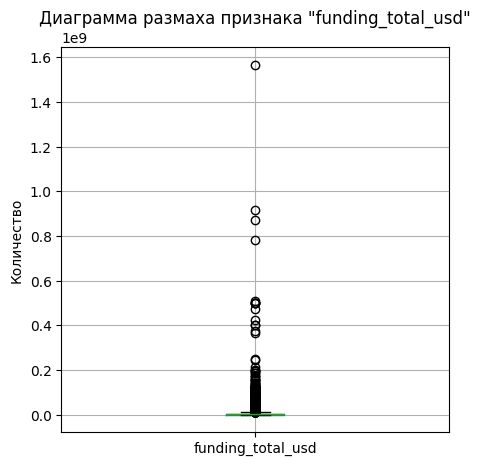

count    4.917000e+03
mean     9.346403e+06
std      4.181248e+07
min      2.000000e+00
25%      3.700000e+05
50%      2.000000e+06
75%      5.000000e+06
max      1.567504e+09
Name: funding_total_usd, dtype: float64


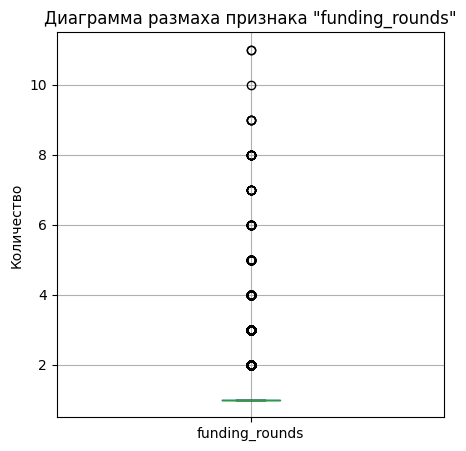

count    4917.00
mean        1.40
std         0.96
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        11.00
Name: funding_rounds, dtype: float64


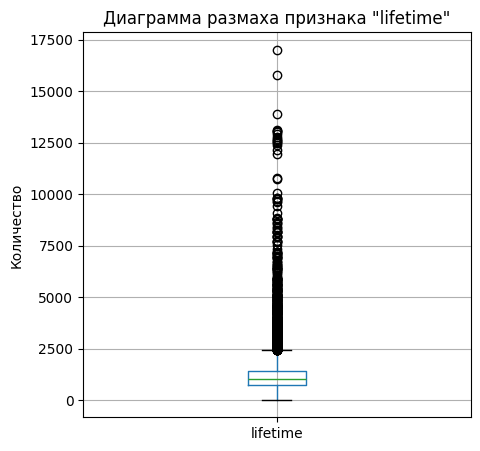

count     4917.00
mean      1399.25
std       1378.29
min         19.00
25%        735.00
50%       1013.00
75%       1407.00
max      17004.00
Name: lifetime, dtype: float64


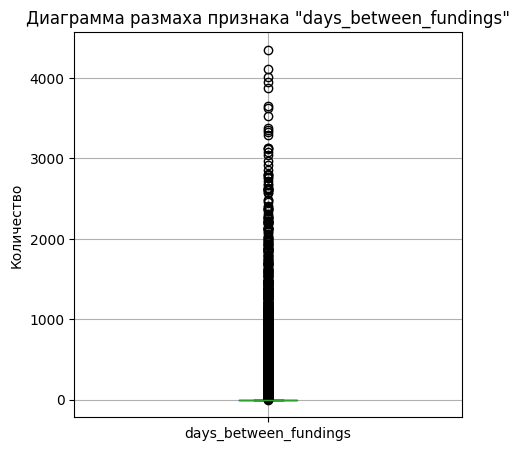

count    4917.00
mean      181.57
std       471.18
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      4353.00
Name: days_between_fundings, dtype: float64


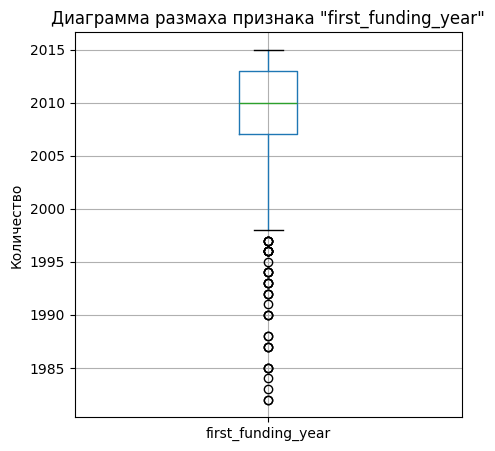

count    4917.00
mean     2009.62
std         4.32
min      1982.00
25%      2007.00
50%      2010.00
75%      2013.00
max      2015.00
Name: first_funding_year, dtype: float64


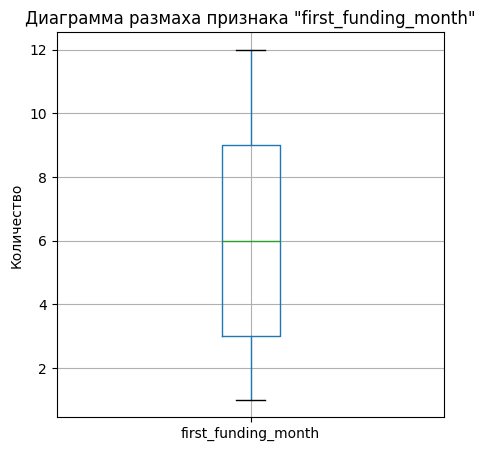

count    4917.00
mean        6.01
std         3.56
min         1.00
25%         3.00
50%         6.00
75%         9.00
max        12.00
Name: first_funding_month, dtype: float64


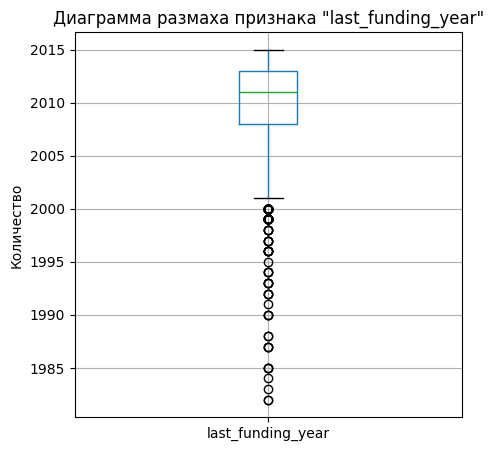

count    4917.00
mean     2010.12
std         4.21
min      1982.00
25%      2008.00
50%      2011.00
75%      2013.00
max      2015.00
Name: last_funding_year, dtype: float64


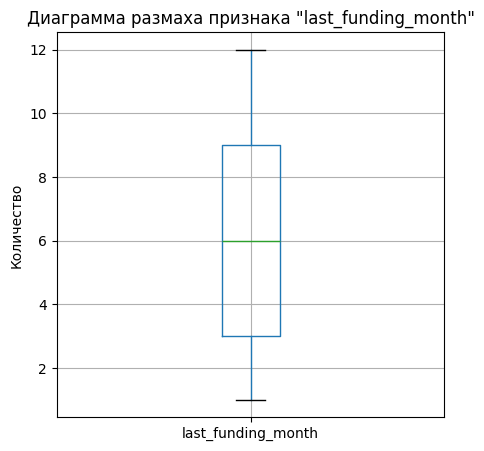

count    4917.00
mean        6.05
std         3.54
min         1.00
25%         3.00
50%         6.00
75%         9.00
max        12.00
Name: last_funding_month, dtype: float64


In [46]:
for column in df_train_operating.select_dtypes(include=['number']).columns:
    whiskers(df_train_operating, column)

for column in df_train_closed.select_dtypes(include=['number']).columns:
    whiskers(df_train_closed, column)

Построим гистограммы для действующих и закрытых стартапов:

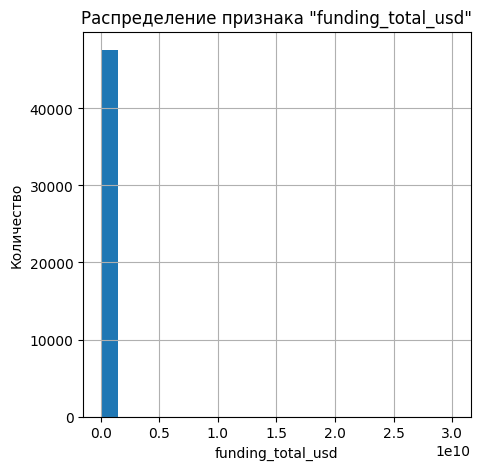

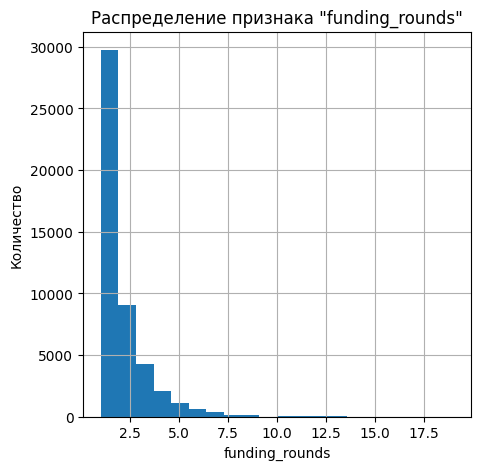

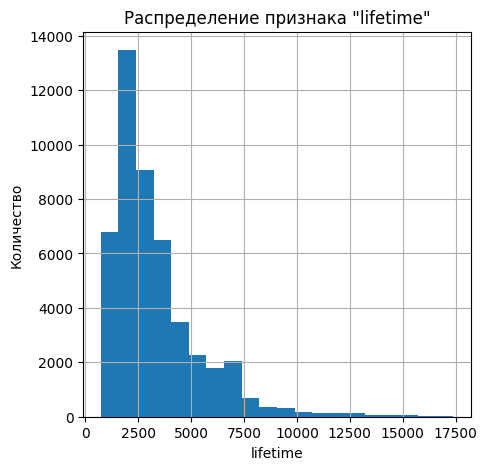

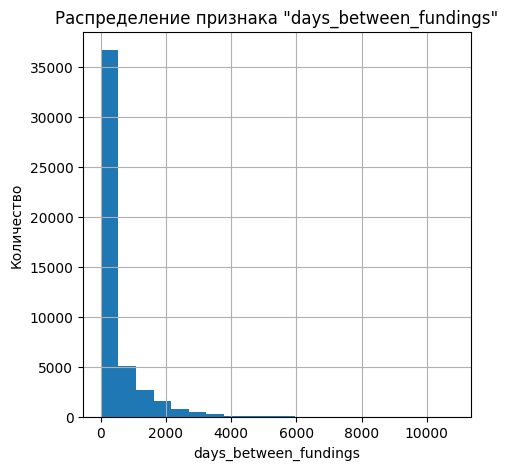

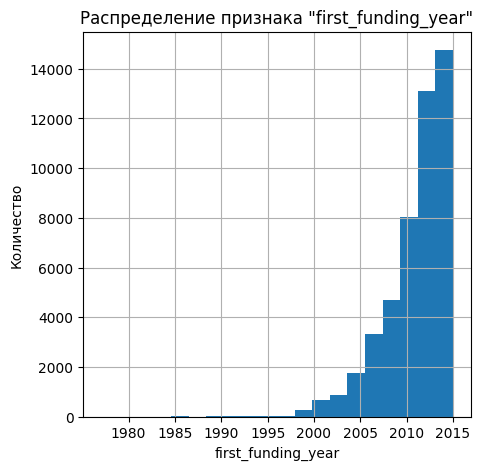

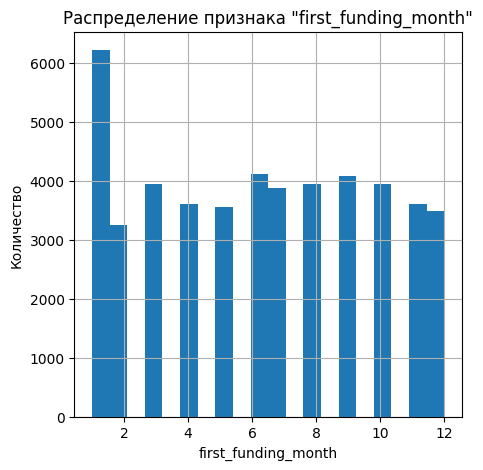

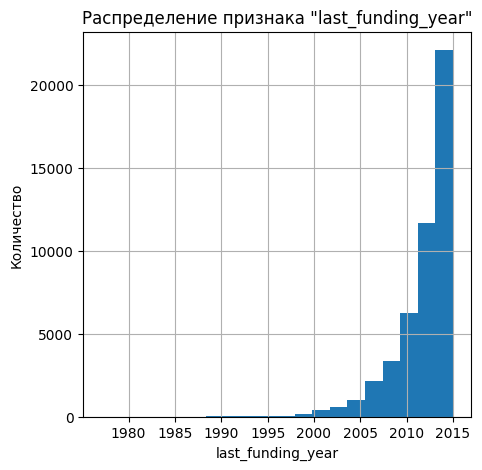

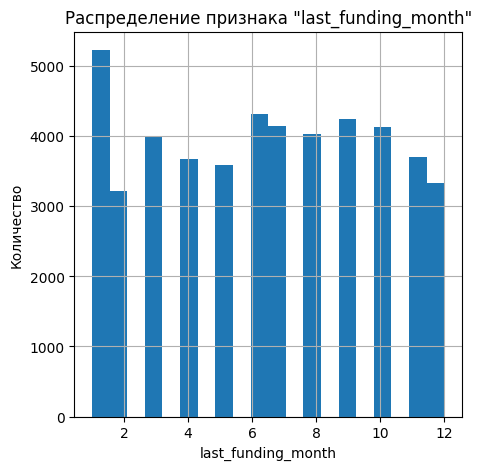

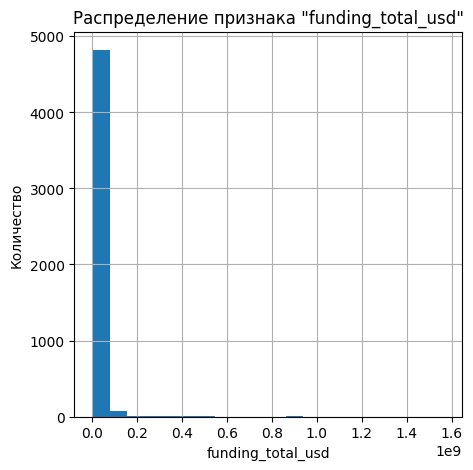

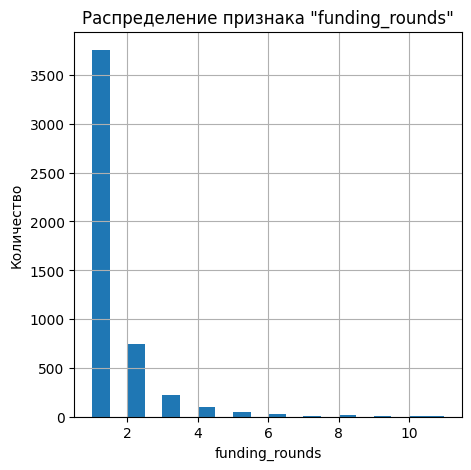

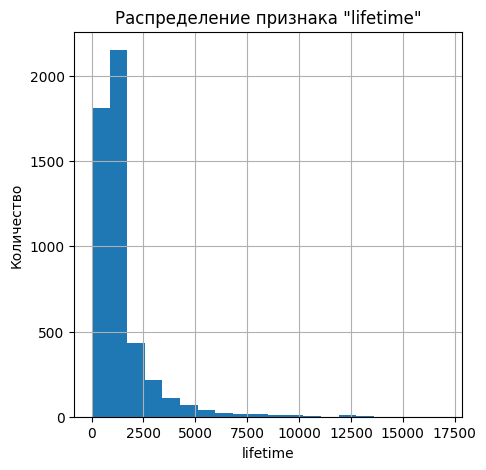

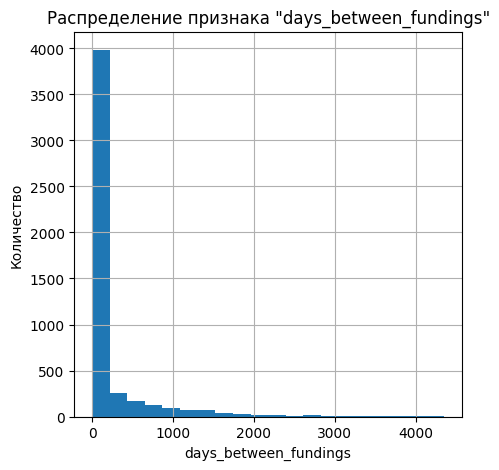

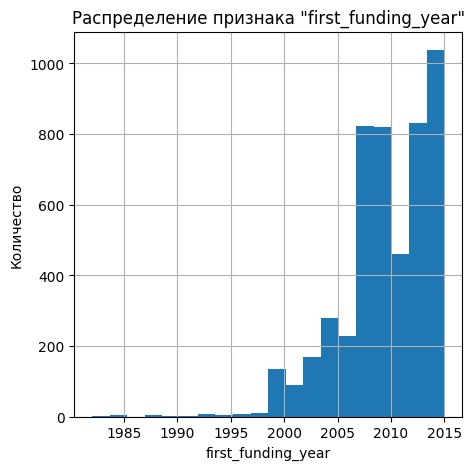

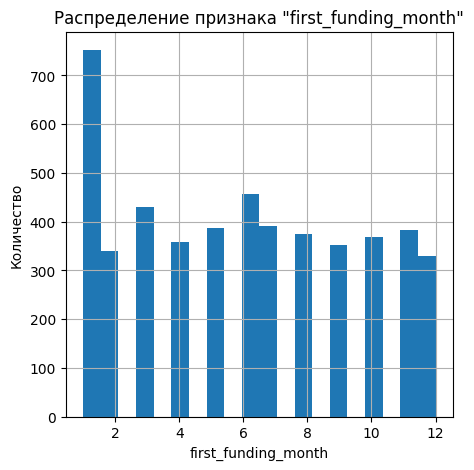

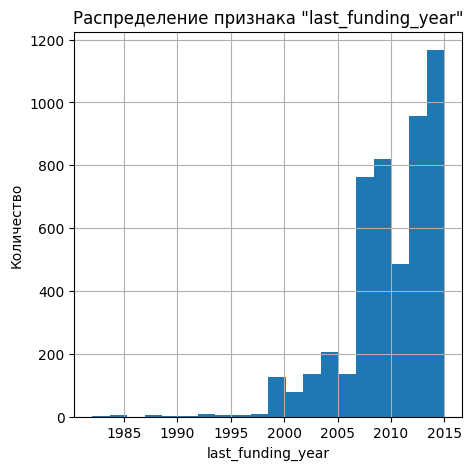

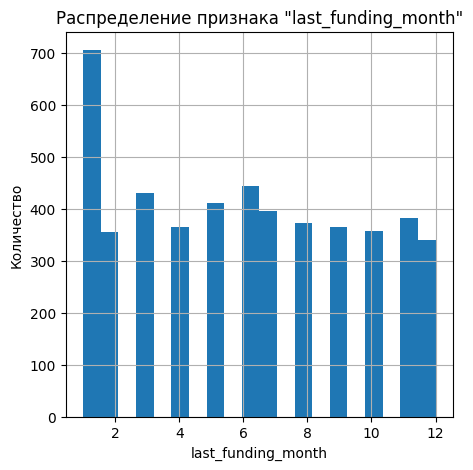

In [47]:
for column in df_train_operating.select_dtypes(include=['number']).columns:
    histogram(df_train_operating, column)

for column in df_train_closed.select_dtypes(include=['number']).columns:
    histogram(df_train_closed, column)

Выводы по разделу:

- `funding_total_usd`: общая средняя сумма финансирования действующих стартапов примерно в 2 раза превышает аналогичную для закрытых (15.7 млн. USD против 9.34 млн. USD, соответственно);
- `funding_rounds`: среднее количество раундов финансирования действующих стартапов почти одинаково с аналогичным для закрытых (1.8 против 1.4, соответственно);
- `lifetime`: среднее время существования открытого стартапа примерно в 2,4 раза выше, чем закрытого (3320 дней против 1399 дней, соответственно);
- `days_between_fundings`: среднее количество дней между первым и последним раундами финансирования для открытого стартапа в 2 раза больше, чем для закрытого (365 дней против 182 дней, соответственно);
- `first_funding_year`: среднее значение года последнего раунда финансирования открытых стартапов - 2011-й, закрытых - 2009-й;
- `first_funding_month`: среднее значение месяца последнего раунда финансирования открытых и закрытых стартапов совпадает - это июнь;
- `last_funding_year`: среднее значение года последнего раунда финансирования открытых стартапов - 2012-й, закрытых - 2010-й;
- `last_funding_month`: среднее значение месяца последнего раунда финансирования открытых и закрытых стартапов совпадает - это июнь;
- действующие стартапы привлекают гораздо больше инвестиций, чем закрытые;
- количество выбросов велико, но аномальных значений обнаружено не было. Даже максимальное финансирование открытого стартапа в 30 млрд. долларов вполне может иметь место.

## Корреляционный анализ признаков

Для начала приведём в бинарный вид целевой признак `status`:

In [48]:
def binary_status(i):
    if i == 'closed':
        return 1
    else:
        return 0

In [49]:
df_train['status'] = df_train['status'].apply(binary_status)

In [50]:
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,class,world_region,lifetime,days_between_fundings,first_funding_year,first_funding_month,last_funding_year,last_funding_month
0,Lunchgate,Online Reservations|Restaurants,828626.0,0,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,Other,Central Europe,2998,1310,2011,5,2014,12
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,0,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,Manufacturing,North America,4748,1393,2010,5,2014,2
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,0,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,Biotechnology,North America,4383,681,2012,8,2014,7
3,Sancilio and Company,Health Care,22250000.0,0,unknown_country_code,unknown_state_code,unknown_region,unknown_city,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,Health Care,unknown_region,5114,1051,2011,9,2014,7
4,WireTough Cylinders,Manufacturing,2000000.0,0,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,Manufacturing,North America,2791,0,2012,2,2012,2


Выводы по разделу:

- целевой признак `status` переведён в бинарный вид, где 1 - статус "закрыт", 0 - статус "открыт".

Используем коэффициент корреляции phik, так как корреляция Пирсона не подходит из-за наличия в датасете категориальных признаков, а часть признаков имеет не нормальное распределение. Построение матрицы для тренировочного датасета вызвало ошибку использования лимита оперативной памяти, поэтому сделаем уменьшенную версию тренировочного датасета, состоящую из 700 записей:

In [51]:
df_train_small, _ = train_test_split(
    df_train,
    train_size=700,
    stratify=df_train['status'],
    random_state=RANDOM_STATE
)

In [52]:
df_train_small=df_train_small.drop('name', axis=1)

In [53]:
num_coll_list =  df_train.select_dtypes(include='number').columns.tolist()

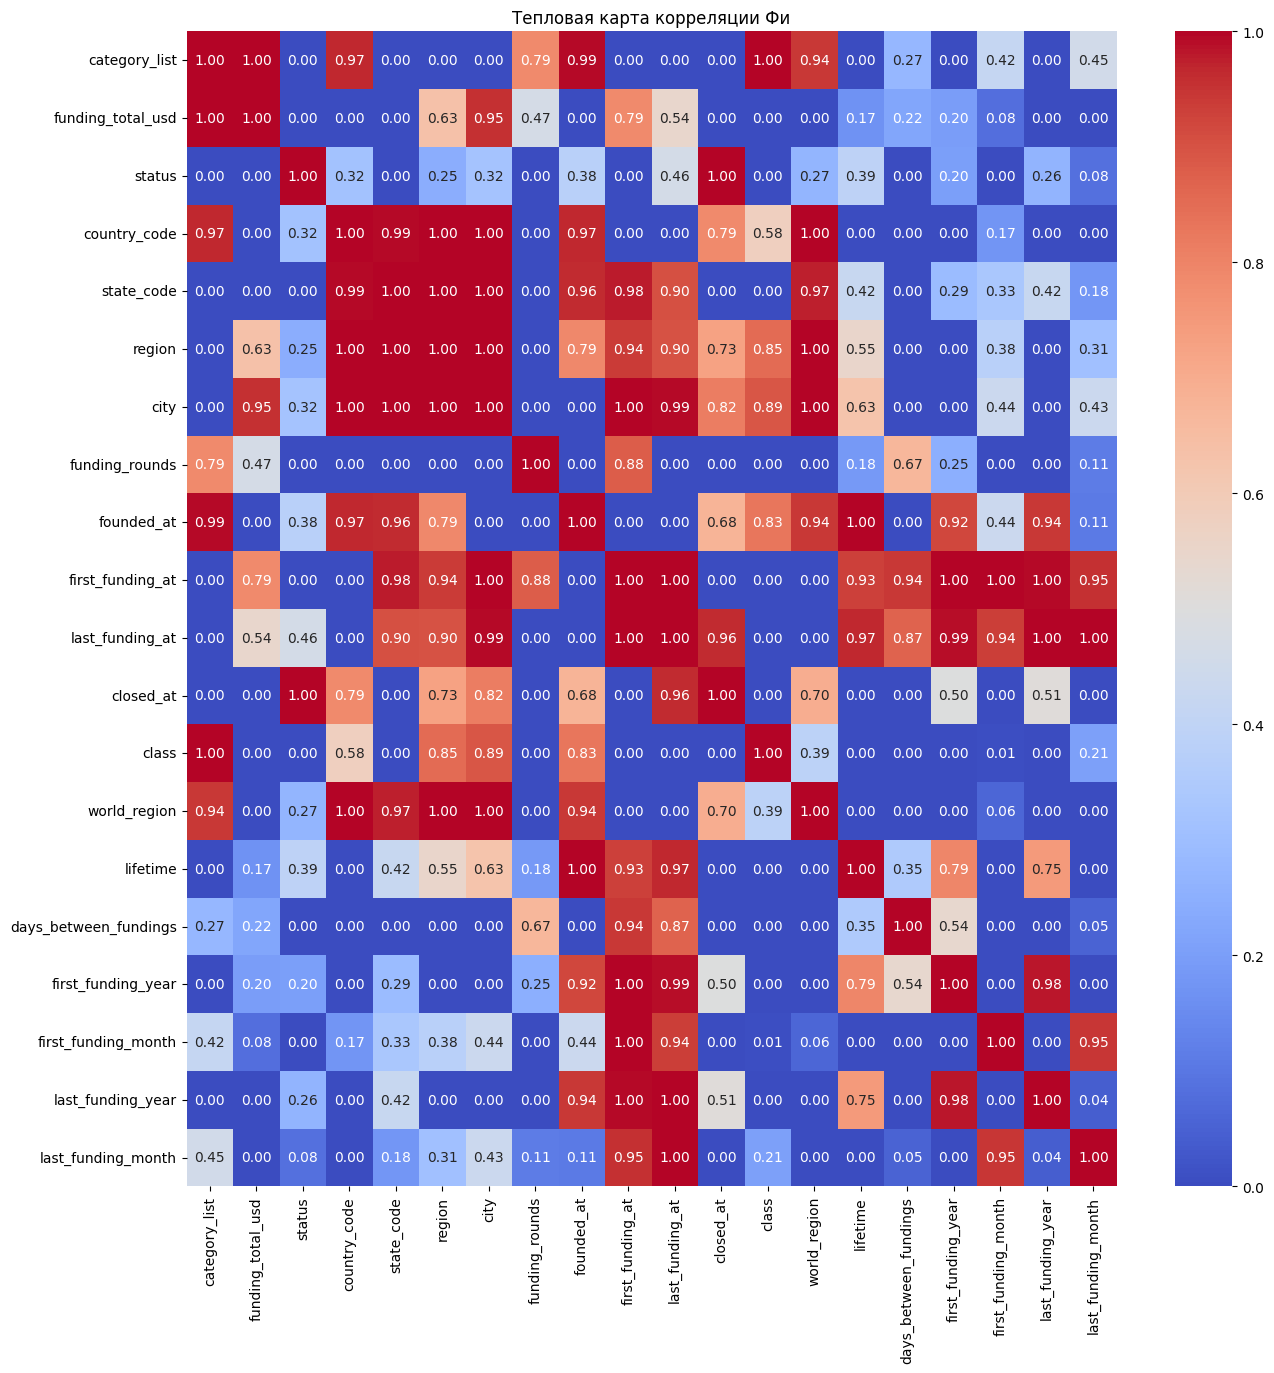

In [54]:
phik_matrix = df_train_small.phik_matrix(interval_cols=num_coll_list)
plt.figure(figsize=(15, 15))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции Фи')
plt.show()

Используя шкалу Чеддока, сопоставим тесноту связей между входными признаками и целевым `status` (0,1-0,3 - слабая; 0,3-0,5 - умеренная; 0,5-0,7 - заметная; 0,7-0,9 - высокая; 0,9-1 - весьма высокая):

Выводы по разделу:

Наблюдаем следующие типы связи `status` с входными признаками:

- с `last_funding_at` = 0,46 (заметная),
- с `last_funding_year` = 0,26 (умеренная),
- с `lifetime` = 0,39 (умеренная),
- с `world_region` = 0,27 (умеренная),
- с `founded_at` = 0,38 (умеренная),
- с `city` = 0,32 (умеренная),
- с `region` = 0,25 (умеренная),
- с `country_code` = 0,32 (умеренная),
- с остальными признаками связь слабая, а с `closed_at` - мультиколлинеарность, что логично.

Между признаками `world_region`, `city`, `region`, `country_code` также выявлена мультиколлинеарность.

## Использование пайплайнов и поиск лучшей прогнозной модели

Разделим датасет на обучающую и тестовую выборки:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(['status', 'name', 'category_list', 'region', \
                'first_funding_at', 'last_funding_at', 'founded_at', \
                'closed_at'], axis=1),
    LabelEncoder().fit_transform(df_train['status']),
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_train['status']
)

Кодируем категорийные и числовые признаки:

In [56]:
ohe_columns = ['country_code', 'state_code', 'city', 'world_region', 'class']
num_columns = ['funding_total_usd', 'funding_rounds', 'lifetime', \
               'days_between_fundings', 'last_funding_year', \
               'last_funding_month', 'first_funding_year', \
               'first_funding_month']

Соберём категорийный пайплайн:

In [57]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, \
                                        strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', \
                          sparse_output=False))
])

In [58]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

In [59]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Перебор будем делать по четырём моделям: `DecisionTree`, `KNN`, `LogisticRegression`, `SVC`, с подобранными гиперпараметрами

In [60]:
param_grid = [
  {
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(2, 5),
    'models__max_features': range(2, 5),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
  },
  {
    'models': [KNeighborsClassifier()],
    'models__n_neighbors': range(2, 5),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
  },
  {
    'models': [LogisticRegression(random_state=RANDOM_STATE, \
                                  solver='liblinear', penalty='l1')],
    'models__C': range(2, 6),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
  },
  {
    'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
    'models__degree': range(2, 3),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
  }
]

Поиск лучшей модели проведём с помощью RandomizedSearch:

In [61]:
randomized_search = RandomizedSearchCV(
  pipe_final,
  param_grid,
  cv=5,
  scoring='f1',
  n_jobs=-1,
  random_state=RANDOM_STATE,
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['country_code',
                                                                                'state_code',
                                                                                'city',
                                                                                'world_region',
                                                                                'class']),...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='f1')

In [62]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:\n\n', \
      randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['country_code', 'state_code',
                                                   'city', 'world_region',
                                                   'class']),
                      

Получили лучший показатель для модели `Logistic regression`, равный 0.77. Для чистоты эксперимента попробуем, как с той же задачей справится модель CatBoost:

In [63]:
pipe_final_catboost = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', CatBoostClassifier(random_state=RANDOM_STATE))
])

In [64]:
param_grid_catboost = [
  {
    'models': [CatBoostClassifier(random_state=RANDOM_STATE)],
    'memory': ['auto'],
    'verbose': [False]
  }
]

In [65]:
randomized_search_catboost = RandomizedSearchCV(
  pipe_final_catboost,
  param_grid_catboost,
  cv=5,
  scoring='f1',
  n_jobs=-1,
  random_state=RANDOM_STATE,
)
randomized_search_catboost.fit(X_train, y_train)

Learning rate set to 0.049448
0:	learn: 0.6134894	total: 119ms	remaining: 1m 59s
1:	learn: 0.5597038	total: 193ms	remaining: 1m 36s
2:	learn: 0.4971249	total: 229ms	remaining: 1m 16s
3:	learn: 0.4444859	total: 261ms	remaining: 1m 5s
4:	learn: 0.4003451	total: 285ms	remaining: 56.6s
5:	learn: 0.3617493	total: 328ms	remaining: 54.4s
6:	learn: 0.3300809	total: 361ms	remaining: 51.2s
7:	learn: 0.3020361	total: 384ms	remaining: 47.6s
8:	learn: 0.2764303	total: 409ms	remaining: 45s
9:	learn: 0.2566615	total: 432ms	remaining: 42.8s
10:	learn: 0.2387616	total: 460ms	remaining: 41.4s
11:	learn: 0.2220307	total: 484ms	remaining: 39.9s
12:	learn: 0.2128952	total: 507ms	remaining: 38.5s
13:	learn: 0.1987832	total: 534ms	remaining: 37.6s
14:	learn: 0.1885049	total: 563ms	remaining: 37s
15:	learn: 0.1779561	total: 591ms	remaining: 36.4s
16:	learn: 0.1688202	total: 618ms	remaining: 35.7s
17:	learn: 0.1644110	total: 641ms	remaining: 35s
18:	learn: 0.1567146	total: 666ms	remaining: 34.4s
19:	learn: 0.1

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['country_code',
                                                                                'state_code',
                                                                                'city',
                                                                                'world_region',
                                                                                'class']),...
                                                                                'days_between_fundings',
                                                                                'last_funding_year',
                                                                                'last_funding_month',
                                                                                'first_funding_year',
                                                                                'first_funding_month'])])),
                                             ('models',
                                              <catboost.core.CatBoostClassifier object at 0x7cc6a5cc3e20>)]),
                   n_jobs=-1,
                   param_distributions=[{'memory': ['auto'],
                                         'models': [<catboost.core.CatBoostClassifier object at 0x7cc6a5cc3eb0>],
                                         'verbose': [False]}],
                   random_state=42, scoring='f1')

In [66]:
print('Метрика лучшей модели на тренировочной выборке:\n\n', \
      randomized_search_catboost.best_score_)

Метрика лучшей модели на тренировочной выборке:

 0.8629224760669214


Хвала Яндексу, модель CatBoost дала лучший показатель (0.86), её и используем для обучения тестового датасета:

In [67]:
y_test_pred = randomized_search_catboost.predict(X_test)
print(f'Метрика f1 на тестовой выборке: {f1_score(y_test, y_test_pred).round(2)}')

Метрика f1 на тестовой выборке: 0.87


Выводы по разделу:

- собрали пайплайн, предварительно закодировав категорийные и числовые признаки;
- обучили 4 модели: `DecisionTree`, `KNN`, `LogisticRegression`, `SVC` со своими гиперпараметрами, лучшей метрикой `f1`, равной 0.77, признана модель `LogisticRegression` с параметрами: C=5, penalty='l1', solver='liblinear';
- обучили модель CatBoost, получив лучший показатель метрики `f1`, равный 0.86;
- на тестовой выборке `f1` равен 0.87, принимаем этот прогноз в качестве достигнутого результата.

## Формирование предсказаний по лучшей модели

Сравним столбцы в тренировочной и тестовой выборках:

In [68]:
print(X_train.columns)

Index(['funding_total_usd', 'country_code', 'state_code', 'city',
       'funding_rounds', 'class', 'world_region', 'lifetime',
       'days_between_fundings', 'first_funding_year', 'first_funding_month',
       'last_funding_year', 'last_funding_month'],
      dtype='object')


In [69]:
print(df_test.columns)

Index(['name', 'category_list', 'funding_total_usd', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'first_funding_at',
       'last_funding_at', 'lifetime', 'class', 'world_region',
       'days_between_fundings', 'first_funding_year', 'first_funding_month',
       'last_funding_year', 'last_funding_month'],
      dtype='object')


Сформируем новый тестовый датасет, без признаков тренировочного:

In [70]:
df_test_to_submit = df_test.drop(['name', 'category_list', 'region', \
                                  'first_funding_at', 'last_funding_at'], \
                                                               axis=1)

Предсказания лучшей модели запишем в переменную `status`:

In [71]:
status = randomized_search_catboost.predict(df_test_to_submit)

In [72]:
# Создадим одноимённый столбец с предсказаниями статуса
df_test_to_submit['status'] = status

In [73]:
# Проверим, что столбец имеет нужные значения
df_test_to_submit['status'].unique()

array([0, 1])

In [74]:
# Добавим столбец с названиями компаний
df_test_to_submit = df_test_to_submit.merge(
    df_test[['name']], how='left', left_index=True, right_index=True
)

In [75]:
df_test_to_submit.head()

,funding_total_usd,country_code,state_code,city,funding_rounds,lifetime,class,world_region,days_between_fundings,first_funding_year,first_funding_month,last_funding_year,last_funding_month,status,name
0,2819200.0,NIC,17,unknown_city,1,3501,Technology,Central America,0,2009,7,2009,7,0,Crystalsol
1,2000000.0,USA,TN,Humboldt,1,2717,Other,North America,0,2010,7,2010,7,0,JBI Fish & Wings
2,428257.0,LUX,3,Esch-sur-alzette,2,1295,Finance,Western Europe,126,2014,5,2014,9,0,COINPLUS
3,34700000.0,USA,CA,San Diego,4,4748,Software,North America,1935,2005,1,2010,4,0,Imagine Communications
4,4530000.0,CAN,ON,Ottawa,1,6209,Software,North America,0,2007,5,2007,5,0,DNA13


In [76]:
# Оставим только два столбца для файла на рассмотрение
columns_to_submit = ['name', 'status']

In [77]:
# Создадим новый датасет с нужными столбцами
df_submit = df_test_to_submit[columns_to_submit]

In [78]:
df_submit.head()

,name,status
0,Crystalsol,0
1,JBI Fish & Wings,0
2,COINPLUS,0
3,Imagine Communications,0
4,DNA13,0


In [79]:
# Раскодируем целевой признак в читаемый вид и запишем файл
def status_decode(i):
    if i == 1:
        return 'closed'
    else:
        return 'open'

df_submit['status'] = df_submit['status'].apply(status_decode)

df_submit.to_csv('submission.csv', index=False)

Вывод по разделу:

- сформировали файл, содержащий названия компаний и их статус (открыт/закрыт) на основании прогноза лучшей модели.

## Анализ важности признаков лучшей модели

In [80]:
# Выбираем лучшую прогнозную модель и явным образом обозначаем
# категориальные признаки
cat_feat = ['country_code', 'state_code', 'city', 'world_region', \
                'class']
model = CatBoostClassifier(cat_features = cat_feat)
model.fit(X_train, y_train)

Learning rate set to 0.049448
0:	learn: 0.6136450	total: 260ms	remaining: 4m 19s
1:	learn: 0.5419981	total: 435ms	remaining: 3m 37s
2:	learn: 0.4823771	total: 548ms	remaining: 3m 2s
3:	learn: 0.4281207	total: 622ms	remaining: 2m 34s
4:	learn: 0.3848092	total: 679ms	remaining: 2m 15s
5:	learn: 0.3578197	total: 729ms	remaining: 2m
6:	learn: 0.3217370	total: 807ms	remaining: 1m 54s
7:	learn: 0.2962819	total: 864ms	remaining: 1m 47s
8:	learn: 0.2803030	total: 890ms	remaining: 1m 38s
9:	learn: 0.2608498	total: 957ms	remaining: 1m 34s
10:	learn: 0.2417536	total: 1.02s	remaining: 1m 31s
11:	learn: 0.2261292	total: 1.08s	remaining: 1m 29s
12:	learn: 0.2091919	total: 1.15s	remaining: 1m 27s
13:	learn: 0.1959674	total: 1.21s	remaining: 1m 25s
14:	learn: 0.1844549	total: 1.3s	remaining: 1m 25s
15:	learn: 0.1743090	total: 1.37s	remaining: 1m 24s
16:	learn: 0.1661522	total: 1.43s	remaining: 1m 22s
17:	learn: 0.1580499	total: 1.5s	remaining: 1m 21s
18:	learn: 0.1524062	total: 1.57s	remaining: 1m 20s

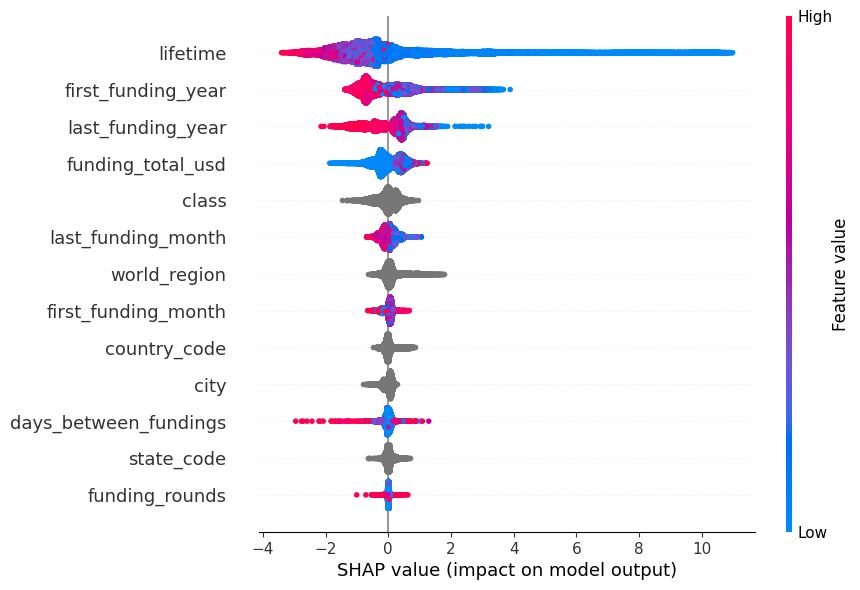

In [81]:
# Используем SHAP для визуализации важности признаков
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train, y_train)
shap.plots.beeswarm(shap_values, max_display=20)

Вывод по разделу:

- тепловая карта показывает, что наиболее важную роль на целевой признак оказывают такие входные признаки, как: `lifetime` (самый важный признак, низкие значения сильно влияют на вероятность закрытия стартапа), `last_funding_year`, `days_between_fundings`, `funding_rounds`. Низкие значения `funding_total_usd` также сильно влияют на вероятность закрытия стартапа. В то же время, "географические" признаки (город, регион, штат и т.д.) не оказывают влияния.

## Отчет по исследованию:


В ходе выполнения проекта были проведены следующие этапы:

- загрузка данных: считаны данные из предоставленных датасетов, названия столбцов не потребовали корректировки, в некоторых столбцах поменяли тип данных на `datetime`, соответственно их значениям;

- предобработка данных: проверили тренировочный и тестовый датасеты на наличие пропусков и явных дубликатов: пропуски в категориальных признаках `name`, `category_list`, `country_code`, `state_code`, `region`, `city` заполнили значениями-заглушками, в признаке `funding_total_usd` - медианными значениями. Явные дубликаты отсутствуют;

- создание новых и корректировка существующих признаков: создали новый признак `class` для разбивки 855 уникальных категорий по основным классам, воспользовавшись ChatGPT; создали новый признак `world_region`, привязав все ISO-3 коды стран к географическим регионам; заполнили пустые значения в признаке `closed_at` датой выгрузки тренировочного датасета; создали новый признак `lifetime` в тренировочной выборке, аналогичный одноимённому в тестовой; создали новые признаки `days_between_fundings`, `first_funding_year`, `first_funding_month`, `last_funding_year`, `last_funding_month`, чтобы использовать их в последующем корреляционном анализе (привели к числовым значениям вместо дат); создали отдельные датасеты для действующих и закрытых стартапов для последующего их изучения;

- исследовательский анализ данных: общая средняя сумма финансирования действующих стартапов примерно в 2 раза превышает аналогичную для закрытых (15.7 млн. USD против 9.34 млн. USD, соответственно); среднее количество раундов финансирования действующих стартапов почти одинаково с аналогичным для закрытых (1.8 против 1.4, соответственно); среднее время существования открытого стартапа примерно в 2,4 раза выше, чем закрытого (3320 дней против 1399 дней, соответственно); среднее количество дней между первым и последним раундами финансирования для открытого стартапа в 2 раза больше, чем для закрытого (365 дней против 182 дней, соответственно); среднее значение года последнего раунда финансирования открытых стартапов - 2011-й, закрытых - 2009-й; среднее значение месяца последнего раунда финансирования открытых и закрытых стартапов совпадает - это июнь; среднее значение года последнего раунда финансирования открытых стартапов - 2012-й, закрытых - 2010-й; среднее значение месяца последнего раунда финансирования открытых и закрытых стартапов совпадает - это июнь; действующие стартапы привлекают гораздо больше инвестиций, чем закрытые; количество выбросов велико, но аномальных значений обнаружено не было. Даже максимальное финансирование открытого стартапа в 30 млрд. долларов вполне может иметь место;

- корреляционный анализ данных: связь целевого признака `status` с входными следующая:
    - с `last_funding_at` = 0,46 (заметная),
    - с `last_funding_year` = 0,26 (умеренная),
    - с `lifetime` = 0,39 (умеренная),
    - с `world_region` = 0,27 (умеренная),
    - с `founded_at` = 0,38 (умеренная),
    - с `city` = 0,32 (умеренная),
    - с `region` = 0,25 (умеренная),
    - с `country_code` = 0,32 (умеренная),
    - с остальными признаками связь слабая, а с `closed_at` - мультиколлинеарность, что логично. Между признаками `world_region`, `city`, `region`, `country_code` также выявлена мультиколлинеарность;

- поиск лучшей прогнозной модели: собрали пайплайн, предварительно закодировав категорийные и числовые признаки; обучили 4 модели: `DecisionTree`, `KNN`, `LogisticRegression`, `SVC` со своими гиперпараметрами, лучшей метрикой `f1`, равной 0.77, признана модель `LogisticRegression` с параметрами: C=5, penalty='l1', solver='liblinear'; обучили модель `CatBoost`, получив более высокий показатель метрики `f1`, равный 0.86; на тестовой выборке `f1` равен 0.87. Модель `CatBoostClassifier` принята для дальнейшего использования;

- формирование предсказаний статуса стартапа: сформировали файл, содержащий названия компаний и их статус (открыт/закрыт) на основании прогноза лучшей модели;

- анализ важности входных признаков: с помощью SHAP убедились, что наиболее важную роль на целевой оказывают такие входные признаки, как: `lifetime` (самый важный признак, низкие значения сильно влияют на вероятность закрытия стартапа), `last_funding_year`, `days_between_fundings`, `funding_rounds`. Низкие значения `funding_total_usd` также сильно влияют на вероятность закрытия стартапа. В то же время, "географические" признаки (город, регион, штат и т.д.) не оказывают влияния.

Выводы и рекомендации.

Ключевыми факторами, влияющими на успешность стартапа (статус `open`), являются: его долгосрочность, стабильное финансирование, год последнего раунда финансирования, количество дней между первым и последним раундами финансирования, а также количество таких раундов.

Прогнозная модель показывает хороший результат, однако, её ещё стоит улучшать. Например, добавив дополнительные признаки, выяснив реальную дату закрытия стартапа (а не дату выгрузки, как в нашем случае). Стоит также разобраться подробнее в категориях вида деятельности компаний. Генерация классов не лучшим образом подходит для этого. Можно углубиться в анализ и посмотреть, как конкретно финансирование влияет на успешность стартапа, в каких странах наибольшее их число и т.д. Также можно попробовать использовать другие модели для поиска лучшего прогноза.